In [380]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt

In [422]:
warnings.filterwarnings('ignore')
data_path = "202107-citibike-tripdata.csv"
df = pd.read_csv(data_path)

In [423]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,247BA541A9674BF3,classic_bike,2021-07-09 16:05:36,2021-07-09 16:18:09,5 Ave & E 93 St,7372.10,Frederick Douglass Blvd & W 117 St,7688.12,40.785785,-73.957481,40.805159,-73.954692,member
1,125C9ACA270A5E2D,classic_bike,2021-07-11 16:23:35,2021-07-11 16:29:07,5 Ave & E 93 St,7372.10,E 88 St & Park Ave,7293.10,40.785785,-73.957481,40.781411,-73.955959,member
2,2E26264BCC15BA05,classic_bike,2021-07-23 06:22:40,2021-07-23 06:36:13,34 St & 38 Ave,6453.02,McGuinness Blvd & Eagle St,5977.01,40.752443,-73.929737,40.735550,-73.952840,member
3,A56D23A088563424,classic_bike,2021-07-05 16:08:10,2021-07-05 16:36:00,Lenox Ave & W 111 St,7602.05,5 Ave & E 78 St,7161.08,40.798786,-73.952300,40.776321,-73.964274,casual
4,1451F4BB884C5335,classic_bike,2021-07-26 12:28:57,2021-07-26 12:30:21,6 Ave & Broome St,5610.09,6 Ave & Canal St,5500.07,40.724310,-74.004730,40.722438,-74.005664,casual


In [424]:
pd.DataFrame.from_records([(col, df[col].nunique(), df[col].dtype, df[col].memory_usage(deep=True) )  for col in df.columns],
  columns=['Column Name', 'Unique', 'Data Type','Memory Usage'])

,Column Name,Unique,Data Type,Memory Usage
0,ride_id,3084537,object,225171329
1,rideable_type,3,object,212794384
2,started_at,1558050,object,234424940
3,ended_at,1560576,object,234424940
4,start_station_name,1492,object,237703352
5,start_station_id,1487,float64,24676424
6,end_station_name,1520,object,237106992
7,end_station_id,2595,object,151133715
8,start_lat,2148,float64,24676424
9,start_lng,2138,float64,24676424


In [425]:
# df['started_at'][0].split(" ")[1]

In [426]:
df['started_at'] = pd.to_datetime(df['started_at'])

In [427]:
df = df[df['ended_at'] != "2021-07-09 09:21:"]

In [428]:
df['ended_at'] = pd.to_datetime(df['ended_at'])

In [429]:
df[['started_at', 'ended_at']]

,started_at,ended_at
0,2021-07-09 16:05:36,2021-07-09 16:18:09
1,2021-07-11 16:23:35,2021-07-11 16:29:07
2,2021-07-23 06:22:40,2021-07-23 06:36:13
3,2021-07-05 16:08:10,2021-07-05 16:36:00
4,2021-07-26 12:28:57,2021-07-26 12:30:21
...,...,...
3084532,2021-07-08 14:08:12,2021-07-08 14:35:15
3084533,2021-07-24 12:26:49,2021-07-24 12:47:18
3084534,2021-07-04 17:11:16,2021-07-04 17:18:23
3084535,2021-07-30 09:43:46,2021-07-30 09:57:50


In [430]:
df['duration'] = df['ended_at'] - df['started_at']

In [431]:
pd.DataFrame.from_records([(col, df[col].nunique(), df[col].dtype, df[col].memory_usage(deep=True) )  for col in df.columns],
  columns=['Column Name', 'Unique', 'Data Type','Memory Usage'])

,Column Name,Unique,Data Type,Memory Usage
0,ride_id,3084537,object,249847497
1,rideable_type,3,object,237470552
2,started_at,1558050,datetime64[ns],49352592
3,ended_at,1560576,datetime64[ns],49352592
4,start_station_name,1492,object,262379520
5,start_station_id,1487,float64,49352592
6,end_station_name,1520,object,261783160
7,end_station_id,2595,object,175809883
8,start_lat,2148,float64,49352592
9,start_lng,2138,float64,49352592


In [432]:
df['duration'][0].total_seconds()/60

12.55

In [433]:
df['duration'] = df['duration'].dt.total_seconds()/60

In [434]:
df['weekday'] = df['started_at'].dt.weekday < 5

In [435]:
#see durations
longdurations = df['duration'][df['duration'] > 360]
longdurations

8277        714.000000
8373        390.816667
8697       5116.066667
8821        768.833333
8952        430.166667
              ...     
3079409    2108.983333
3080570     606.450000
3081117     720.483333
3083275     747.166667
3083641     403.516667
Name: duration, Length: 5394, dtype: float64

In [436]:
df['duration'][df['duration'] > 360]

8277        714.000000
8373        390.816667
8697       5116.066667
8821        768.833333
8952        430.166667
              ...     
3079409    2108.983333
3080570     606.450000
3081117     720.483333
3083275     747.166667
3083641     403.516667
Name: duration, Length: 5394, dtype: float64

In [437]:
#remove durations over 6 hours
df = df[df['duration'] < 360]

In [438]:
df[['started_at', 'ended_at']]

,started_at,ended_at
0,2021-07-09 16:05:36,2021-07-09 16:18:09
1,2021-07-11 16:23:35,2021-07-11 16:29:07
2,2021-07-23 06:22:40,2021-07-23 06:36:13
3,2021-07-05 16:08:10,2021-07-05 16:36:00
4,2021-07-26 12:28:57,2021-07-26 12:30:21
...,...,...
3084532,2021-07-08 14:08:12,2021-07-08 14:35:15
3084533,2021-07-24 12:26:49,2021-07-24 12:47:18
3084534,2021-07-04 17:11:16,2021-07-04 17:18:23
3084535,2021-07-30 09:43:46,2021-07-30 09:57:50


In [439]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,duration,weekday
0,247BA541A9674BF3,classic_bike,2021-07-09 16:05:36,2021-07-09 16:18:09,5 Ave & E 93 St,7372.10,Frederick Douglass Blvd & W 117 St,7688.12,40.785785,-73.957481,40.805159,-73.954692,member,12.550000,True
1,125C9ACA270A5E2D,classic_bike,2021-07-11 16:23:35,2021-07-11 16:29:07,5 Ave & E 93 St,7372.10,E 88 St & Park Ave,7293.10,40.785785,-73.957481,40.781411,-73.955959,member,5.533333,False
2,2E26264BCC15BA05,classic_bike,2021-07-23 06:22:40,2021-07-23 06:36:13,34 St & 38 Ave,6453.02,McGuinness Blvd & Eagle St,5977.01,40.752443,-73.929737,40.735550,-73.952840,member,13.550000,True
3,A56D23A088563424,classic_bike,2021-07-05 16:08:10,2021-07-05 16:36:00,Lenox Ave & W 111 St,7602.05,5 Ave & E 78 St,7161.08,40.798786,-73.952300,40.776321,-73.964274,casual,27.833333,True
4,1451F4BB884C5335,classic_bike,2021-07-26 12:28:57,2021-07-26 12:30:21,6 Ave & Broome St,5610.09,6 Ave & Canal St,5500.07,40.724310,-74.004730,40.722438,-74.005664,casual,1.400000,True


In [440]:
# 1. Using the start time and end time, compute the duration of each ride in minutes and plot
# the histogram of ride durations.

l = []
times = []
for t in range(0,360,5):
    x = df[df['duration'] > t]
    y = x[x['duration'] <= t+5]
    l.append(len(y))
    times.append((t,t+5))

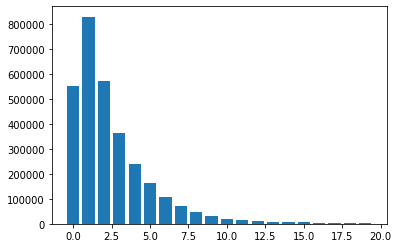

In [442]:
# times
plt.bar(range(20),l[:20])
plt.show()

In [443]:
df['col'] = np.arange(len(df))

In [475]:
# 2. What is the expected ride duration (i.e., the average ride duration)? 

df.shape
n = df.shape[0]
n

exp_duration = df['duration'].sum()/n
print("Expected ride duration: ", exp_duration)

# What is the empirical variance of ride duration? 

# var(X) = E[X^2] - E[X]^2

df['sq_duration'] = df['duration']**2
exp_sq_duration = df['sq_duration'].sum()/n
#print(exp_sq_duration)

var_duration = exp_sq_duration - exp_duration**2 
print("Variance in ride duration: ", var_duration)

# What is the probability that a ride duration is greater than 20 min?
over_20 = len(df[df['duration'] > 20])
        
p_over_20 = over_20/n
print("Probability of ride lasting > 20 mins: ", p_over_20)


Expected ride duration:  16.024268121573645
Variance in ride duration:  331.23669149159
Probability of ride lasting > 20 mins:  0.24843698392702127


In [477]:
# 3. What is the probability that a ride duration is greater than 20 min conditioning on the fact that the user is a CitiBike member?

over_20_member = 0
member_rides = 0

member_df = df[df['member_casual'] == 'member']
member_rides = len(member_df)
over_20_member = len(member_df[member_df['duration'] > 20])
        
p_over_20_mem = over_20_member/member_rides
print(p_over_20_mem)

0.1935716588128751


In [484]:
# 4.Suppose that the duration of some ride is more than 25min. What is the probability that this ride belongs to a CitiBike member?

# Bayes: P(Member|25+) = P(25+|Member)*P(Member)/( P(25+|Member)*P(Member) + P(25+|Casual)*P(Casual))

#compute P(Member) and P(Casual)
p_member = member_rides/n
p_casual = 1 - p_member

# P(25+|Member) and P(25+|Casual)
over25_member = 0
over25_casual = 0

df_over25 = df[df['duration'] > 25]
over25_member = len(df_over25[df_over25['member_casual'] == 'member'])
over25_casual = len(df_over25) - over25_member

# for i in range(n):
#     if df['duration'][i] > 25:
#         if df['member_casual'][i] == 'member':
#             over25_member += 1
#         else:
#             over25_casual += 1

p_over25_member = over25_member/member_rides
p_over25_casual = over25_casual/member_rides

numerator = p_over25_member * p_member
denominator = p_over25_member * p_member + p_over25_casual * p_casual

p_member_given_over25 = numerator/denominator

p_member_given_over25




0.6420089255829386

In [637]:
# function to build a transition matrix given transition frequencies
# frequencies is an array of length 2*(station capacity) + 1:

f = [0, 0, 0, 3, 40, 84, 100, 80, 35, 1, 0, 0, 0] #capacity 6 example
#   [-6,-5,-4,-3,-2, -1,  0,  +1, +2,+3,+4,+5,+6]

def matrix(frequencies):
    
    m = len(frequencies) #note that m is always odd
    rides = sum(frequencies)
    
    probs = [freq/rides for freq in frequencies]
    
    zero_index = int(m/2)
    
    rows = []
    for i in range(int(m/2) + 1):
        rows.append(probs[zero_index - i : m - i])
        s = sum(rows[-1])
        rows[-1] = [p/s for p in rows[-1]]
        
    return rows


for row in matrix(f):
    print(row)


[0.462962962962963, 0.3703703703703704, 0.16203703703703706, 0.00462962962962963, 0.0, 0.0, 0.0]
[0.27999999999999997, 0.33333333333333337, 0.26666666666666666, 0.11666666666666667, 0.003333333333333333, 0.0, 0.0]
[0.1176470588235294, 0.24705882352941175, 0.29411764705882354, 0.2352941176470588, 0.10294117647058823, 0.0029411764705882353, 0.0]
[0.008746355685131197, 0.11661807580174928, 0.2448979591836735, 0.29154518950437325, 0.23323615160349856, 0.10204081632653063, 0.002915451895043732]
[0.0, 0.008771929824561405, 0.11695906432748539, 0.2456140350877193, 0.2923976608187135, 0.23391812865497078, 0.10233918128654972]
[0.0, 0.0, 0.00977198697068404, 0.13029315960912052, 0.2736156351791531, 0.32573289902280134, 0.26058631921824105]
[0.0, 0.0, 0.0, 0.013215859030837006, 0.1762114537444934, 0.37004405286343617, 0.4405286343612336]


#### Project

In [486]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,duration,weekday,col,sq_duration
0,247BA541A9674BF3,classic_bike,2021-07-09 16:05:36,2021-07-09 16:18:09,5 Ave & E 93 St,7372.10,Frederick Douglass Blvd & W 117 St,7688.12,40.785785,-73.957481,40.805159,-73.954692,member,12.550000,True,0,157.502500
1,125C9ACA270A5E2D,classic_bike,2021-07-11 16:23:35,2021-07-11 16:29:07,5 Ave & E 93 St,7372.10,E 88 St & Park Ave,7293.10,40.785785,-73.957481,40.781411,-73.955959,member,5.533333,False,1,30.617778
2,2E26264BCC15BA05,classic_bike,2021-07-23 06:22:40,2021-07-23 06:36:13,34 St & 38 Ave,6453.02,McGuinness Blvd & Eagle St,5977.01,40.752443,-73.929737,40.735550,-73.952840,member,13.550000,True,2,183.602500
3,A56D23A088563424,classic_bike,2021-07-05 16:08:10,2021-07-05 16:36:00,Lenox Ave & W 111 St,7602.05,5 Ave & E 78 St,7161.08,40.798786,-73.952300,40.776321,-73.964274,casual,27.833333,True,3,774.694444
4,1451F4BB884C5335,classic_bike,2021-07-26 12:28:57,2021-07-26 12:30:21,6 Ave & Broome St,5610.09,6 Ave & Canal St,5500.07,40.724310,-74.004730,40.722438,-74.005664,casual,1.400000,True,4,1.960000


In [487]:
string = df['started_at'].astype(str)
times = string.str.slice(start=11)

In [488]:
times

0          16:05:36
1          16:23:35
2          06:22:40
3          16:08:10
4          12:28:57
             ...   
3084532    14:08:12
3084533    12:26:49
3084534    17:11:16
3084535    09:43:46
3084536    17:02:26
Name: started_at, Length: 3079143, dtype: object

In [489]:
times.index

Int64Index([      0,       1,       2,       3,       4,       5,       6,
                  7,       8,       9,
            ...
            3084527, 3084528, 3084529, 3084530, 3084531, 3084532, 3084533,
            3084534, 3084535, 3084536],
           dtype='int64', length=3079143)

In [490]:
time_array=[]
for i in times.index:
    h, m, s = times[i].split(':')
    time = int(h) * 3600 + int(m) * 60 + int(s)
    time_array.append(time)
    

(array([ 52222.,  34778.,  23759.,  16071.,  12038.,  15432.,  42637.,
         80804., 127834., 141477., 127092., 139019., 162712., 170012.,
        182513., 188434., 200593., 226819., 255657., 246989., 203682.,
        149594., 110456.,  92563.,  75956.]),
 array([    0.  ,  3455.96,  6911.92, 10367.88, 13823.84, 17279.8 ,
        20735.76, 24191.72, 27647.68, 31103.64, 34559.6 , 38015.56,
        41471.52, 44927.48, 48383.44, 51839.4 , 55295.36, 58751.32,
        62207.28, 65663.24, 69119.2 , 72575.16, 76031.12, 79487.08,
        82943.04, 86399.  ]),
 <a list of 25 Patch objects>)

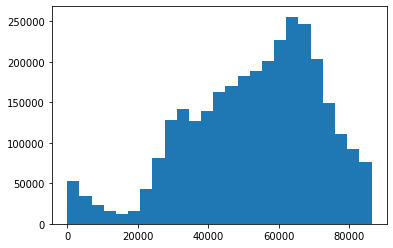

In [491]:
plt.hist(time_array,bins=25)

In [492]:
df['start_times'] = time_array

In [493]:
string2 = df['ended_at'].astype(str)
times2 = string2.str.slice(start=11)

In [494]:
end_time_array=[]
for i in times2.index:
    h, m, s = times2[i].split(':')
    time = int(h) * 3600 + int(m) * 60 + int(s)
    end_time_array.append(time)

In [495]:
df['end_times'] = end_time_array

In [496]:
df

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,duration,weekday,col,sq_duration,start_times,end_times
0,247BA541A9674BF3,classic_bike,2021-07-09 16:05:36,2021-07-09 16:18:09,5 Ave & E 93 St,7372.10,Frederick Douglass Blvd & W 117 St,7688.12,40.785785,-73.957481,40.805159,-73.954692,member,12.550000,True,0,157.502500,57936,58689
1,125C9ACA270A5E2D,classic_bike,2021-07-11 16:23:35,2021-07-11 16:29:07,5 Ave & E 93 St,7372.10,E 88 St & Park Ave,7293.10,40.785785,-73.957481,40.781411,-73.955959,member,5.533333,False,1,30.617778,59015,59347
2,2E26264BCC15BA05,classic_bike,2021-07-23 06:22:40,2021-07-23 06:36:13,34 St & 38 Ave,6453.02,McGuinness Blvd & Eagle St,5977.01,40.752443,-73.929737,40.735550,-73.952840,member,13.550000,True,2,183.602500,22960,23773
3,A56D23A088563424,classic_bike,2021-07-05 16:08:10,2021-07-05 16:36:00,Lenox Ave & W 111 St,7602.05,5 Ave & E 78 St,7161.08,40.798786,-73.952300,40.776321,-73.964274,casual,27.833333,True,3,774.694444,58090,59760
4,1451F4BB884C5335,classic_bike,2021-07-26 12:28:57,2021-07-26 12:30:21,6 Ave & Broome St,5610.09,6 Ave & Canal St,5500.07,40.724310,-74.004730,40.722438,-74.005664,casual,1.400000,True,4,1.960000,44937,45021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3084532,70330CE2E6FF7873,classic_bike,2021-07-08 14:08:12,2021-07-08 14:35:15,DeKalb Ave & S Portland Ave,4546.04,E 16 St & 5 Ave,6022.04,40.689810,-73.974931,40.737262,-73.992390,casual,27.050000,True,3079138,731.702500,50892,52515
3084533,5F986BABD3470AC0,classic_bike,2021-07-24 12:26:49,2021-07-24 12:47:18,9 Ave & W 18 St,6190.08,West St & Liberty St,5184.08,40.743174,-74.003664,40.711444,-74.014847,casual,20.483333,False,3079139,419.566944,44809,46038
3084534,88946134552A99EC,classic_bike,2021-07-04 17:11:16,2021-07-04 17:18:23,DeKalb Ave & S Portland Ave,4546.04,Willoughby Ave & Hall St,4611.03,40.689810,-73.974931,40.691960,-73.965369,casual,7.116667,False,3079140,50.646944,61876,62303
3084535,5AA6219AC31E068E,classic_bike,2021-07-30 09:43:46,2021-07-30 09:57:50,9 Ave & W 18 St,6190.08,Allen St & Stanton St,5484.09,40.743174,-74.003664,40.722055,-73.989111,member,14.066667,True,3079141,197.871111,35026,35870


In [497]:
morning_df = df[df['start_times']>=18000]
morning_df = morning_df[morning_df['start_times']<=50400]
morning_df

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,duration,weekday,col,sq_duration,start_times,end_times
2,2E26264BCC15BA05,classic_bike,2021-07-23 06:22:40,2021-07-23 06:36:13,34 St & 38 Ave,6453.02,McGuinness Blvd & Eagle St,5977.01,40.752443,-73.929737,40.735550,-73.952840,member,13.550000,True,2,183.602500,22960,23773
4,1451F4BB884C5335,classic_bike,2021-07-26 12:28:57,2021-07-26 12:30:21,6 Ave & Broome St,5610.09,6 Ave & Canal St,5500.07,40.724310,-74.004730,40.722438,-74.005664,casual,1.400000,True,4,1.960000,44937,45021
5,1712824C44D3DB98,classic_bike,2021-07-10 10:03:35,2021-07-10 10:15:02,6 Ave & Broome St,5610.09,W 20 St & 7 Ave,6182.02,40.724310,-74.004730,40.742388,-73.997262,casual,11.450000,False,5,131.102500,36215,36902
15,73372B56E338F871,classic_bike,2021-07-05 08:42:51,2021-07-05 08:53:51,W 100 St & Manhattan Ave,7538.14,Park Ave & E 124 St,7682.01,40.795000,-73.964500,40.804555,-73.939686,member,11.000000,True,15,121.000000,31371,32031
18,25B338A1C3449CD5,classic_bike,2021-07-29 07:51:25,2021-07-29 07:54:09,6 Ave & Broome St,5610.09,Mercer St & Spring St,5532.01,40.724310,-74.004730,40.723627,-73.999496,member,2.733333,True,18,7.471111,28285,28449
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3084520,5A3AFE3FD5492722,classic_bike,2021-07-24 12:38:01,2021-07-24 12:52:09,W Broadway & Spring St,5569.06,West St & Liberty St,5184.08,40.724947,-74.001659,40.711444,-74.014847,casual,14.133333,False,3079126,199.751111,45481,46329
3084521,B23435BC04FCEF08,classic_bike,2021-07-14 12:58:49,2021-07-14 13:05:11,Underhill Ave & Pacific St,4231.04,Willoughby Ave & Hall St,4611.03,40.680484,-73.964680,40.691960,-73.965369,casual,6.366667,True,3079127,40.534444,46729,47111
3084525,E975ACEBCC217F0A,classic_bike,2021-07-28 06:27:42,2021-07-28 06:56:15,Columbus Ave & W 72 St,7175.05,West St & Liberty St,5184.08,40.777057,-73.978985,40.711444,-74.014847,casual,28.550000,True,3079131,815.102500,23262,24975
3084533,5F986BABD3470AC0,classic_bike,2021-07-24 12:26:49,2021-07-24 12:47:18,9 Ave & W 18 St,6190.08,West St & Liberty St,5184.08,40.743174,-74.003664,40.711444,-74.014847,casual,20.483333,False,3079139,419.566944,44809,46038


In [498]:
evening_df = df[df['start_times']>=50400]
evening_df = evening_df[evening_df['start_times']<=86400]
evening_df

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,duration,weekday,col,sq_duration,start_times,end_times
0,247BA541A9674BF3,classic_bike,2021-07-09 16:05:36,2021-07-09 16:18:09,5 Ave & E 93 St,7372.10,Frederick Douglass Blvd & W 117 St,7688.12,40.785785,-73.957481,40.805159,-73.954692,member,12.550000,True,0,157.502500,57936,58689
1,125C9ACA270A5E2D,classic_bike,2021-07-11 16:23:35,2021-07-11 16:29:07,5 Ave & E 93 St,7372.10,E 88 St & Park Ave,7293.10,40.785785,-73.957481,40.781411,-73.955959,member,5.533333,False,1,30.617778,59015,59347
3,A56D23A088563424,classic_bike,2021-07-05 16:08:10,2021-07-05 16:36:00,Lenox Ave & W 111 St,7602.05,5 Ave & E 78 St,7161.08,40.798786,-73.952300,40.776321,-73.964274,casual,27.833333,True,3,774.694444,58090,59760
6,705C67CE4C430371,classic_bike,2021-07-05 15:47:30,2021-07-05 16:12:06,Grove St & Broadway,4526.01,Knickerbocker Ave & George St,4979.07,40.690470,-73.923511,40.704425,-73.928360,casual,24.600000,True,6,605.160000,56850,58326
7,CDF176E41F8F7CED,classic_bike,2021-07-21 20:09:26,2021-07-21 20:59:05,6 Ave & Broome St,5610.09,6 Ave & Canal St,5500.07,40.724310,-74.004730,40.722438,-74.005664,casual,49.650000,True,7,2465.122500,72566,75545
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3084530,F46EFAA9BB728EDA,classic_bike,2021-07-31 15:24:50,2021-07-31 15:39:23,Columbus Ave & W 72 St,7175.05,Columbus Ave & W 95 St,7520.07,40.777057,-73.978985,40.791956,-73.968087,casual,14.550000,False,3079136,211.702500,55490,56363
3084531,10593CD51B551208,classic_bike,2021-07-25 19:08:24,2021-07-25 19:52:47,9 Ave & W 18 St,6190.08,West St & Liberty St,5184.08,40.743174,-74.003664,40.711444,-74.014847,casual,44.383333,False,3079137,1969.880278,68904,71567
3084532,70330CE2E6FF7873,classic_bike,2021-07-08 14:08:12,2021-07-08 14:35:15,DeKalb Ave & S Portland Ave,4546.04,E 16 St & 5 Ave,6022.04,40.689810,-73.974931,40.737262,-73.992390,casual,27.050000,True,3079138,731.702500,50892,52515
3084534,88946134552A99EC,classic_bike,2021-07-04 17:11:16,2021-07-04 17:18:23,DeKalb Ave & S Portland Ave,4546.04,Willoughby Ave & Hall St,4611.03,40.689810,-73.974931,40.691960,-73.965369,casual,7.116667,False,3079140,50.646944,61876,62303


In [499]:
# df3 = morning_df[morning_df['start_station_id'] == 7372.10]
# df4 = morning_df[morning_df['end_station_id'] == 7372.10]
# station1 = pd.concat([df3, df4])
# station1

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,duration,weekday,col,sq_duration,start_times,end_times
21,AA070023E71B68B6,classic_bike,2021-07-26 10:54:28,2021-07-26 11:11:10,5 Ave & E 93 St,7372.10,W 54 St & 11 Ave,6955.05,40.785785,-73.957481,40.768333,-73.992573,member,16.700000,True,21,278.890000,39268,40270
32,3B35C3857A8C2F3C,classic_bike,2021-07-05 11:35:50,2021-07-05 11:45:07,5 Ave & E 93 St,7372.10,E 81 St & 2 Ave,7121.05,40.785785,-73.957481,40.774779,-73.954275,member,9.283333,True,32,86.180278,41750,42307
33,E39D633A34DD1BC4,classic_bike,2021-07-21 11:10:25,2021-07-21 11:21:12,5 Ave & E 93 St,7372.10,E 81 St & 2 Ave,7121.05,40.785785,-73.957481,40.774779,-73.954275,member,10.783333,True,33,116.280278,40225,40872
48,3B9869D1652E0571,classic_bike,2021-07-24 09:28:07,2021-07-24 10:05:50,5 Ave & E 93 St,7372.10,Lexington Ave & E 29 St,6164.09,40.785785,-73.957481,40.743116,-73.982154,member,37.716667,False,48,1422.546944,34087,36350
94,09F2F7FE7906E850,classic_bike,2021-07-05 12:59:01,2021-07-05 13:13:07,5 Ave & E 93 St,7372.10,Lenox Ave & W 111 St,7602.05,40.785785,-73.957481,40.798786,-73.952300,member,14.100000,True,94,198.810000,46741,47587
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
671432,835037A2EBF0DA5E,classic_bike,2021-07-04 11:30:58,2021-07-04 11:40:30,East End Ave & E 86 St,7113.08,5 Ave & E 93 St,7372.1,40.775186,-73.944461,40.785785,-73.957481,member,9.533333,False,670153,90.884444,41458,42030
671433,0A2F3CC0F3C99ED1,classic_bike,2021-07-23 07:55:20,2021-07-23 08:13:29,East End Ave & E 86 St,7113.08,5 Ave & E 93 St,7372.1,40.775186,-73.944461,40.785785,-73.957481,member,18.150000,True,670154,329.422500,28520,29609
672234,B1907DEDD56BB2FD,classic_bike,2021-07-29 11:01:05,2021-07-29 11:17:02,5 Ave & E 63 St,6904.06,5 Ave & E 93 St,7372.1,40.766368,-73.971518,40.785785,-73.957481,member,15.950000,True,670955,254.402500,39665,40622
672616,4F87AAA5483C55E4,classic_bike,2021-07-01 11:56:26,2021-07-01 12:10:33,6 Ave & W 45 St,6593.15,5 Ave & E 93 St,7372.1,40.756951,-73.982631,40.785785,-73.957481,member,14.116667,True,671336,199.280278,42986,43833


In [500]:
len(df3)

2074

In [713]:
def farray_morning(stationid, station_capacity, station_df):
    freq = [0 for i in range(station_capacity*2 + 1)]


    for i in range(108):
        net_change = 0

        for index, row in station_df.iterrows():

            if row['start_station_id'] == stationid:

                if row['start_times'] >= 18000 + 300*i and row['start_times'] < 18300 + 300*i:
                    net_change -= 1

            if row['end_station_id'] == stationid:

                if row['end_times'] >= 18000 + 300*i and row['end_times'] < 18300 + 300*i:
                    net_change += 1

        freq[net_change + station_capacity] += 1
        
    return freq

def farray_evening(stationid, station_capacity, station_df):
    freq = [0 for i in range(station_capacity*2 + 1)]


    for i in range(108):
        net_change = 0

        for index, row in station_df.iterrows():

            if row['start_station_id'] == stationid:

                if row['start_times'] >= 50400 + 300*i and row['start_times'] < 50700 + 300*i:
                    net_change -= 1

            if row['end_station_id'] == stationid:

                if row['end_times'] >= 50400 + 300*i and row['end_times'] < 50700 + 300*i:
                    net_change += 1

        freq[net_change + station_capacity] += 1
        
    return freq

In [714]:
station_capacity = [43, 52, 44]
stationid = [7372.10, 6779.04 , 6593.15]
stationname = ["5 Ave & E 93 St", "Broadway & W 51 St", "6 Ave & W 45 St"]

frequencies_morning = []
transitionmtx_morning = []

frequencies_evening = []
transitionmtx_evening = []

for s in range(len(stationid)):
    
    print("Morning\n")

    df3 = morning_df[morning_df['start_station_id'] == stationid[s]]
    df4 = morning_df[morning_df['end_station_id'] == stationid[s]]
    station1 = pd.concat([df3, df4])
    station1
    
    frequencies_morning.append(farray_morning(stationid[s], station_capacity[s], station1))
    transitionmtx_morning.append(matrix(frequencies_morning[s]))
    
    print("Station {} Frequency Array: {}\n".format(stationname[s], frequencies_morning[s]))
    print("Station {} Transition Matrix: {}\n".format(stationname[s], transitionmtx_morning[s]))
    
    print("Evening\n")
    
    df5 = evening_df[evening_df['start_station_id'] == stationid[s]]
    df6 = evening_df[evening_df['end_station_id'] == stationid[s]]
    station2 = pd.concat([df5, df6])
    station2
    
    frequencies_evening.append(farray_evening(stationid[s], station_capacity[s], station2))
    transitionmtx_evening.append(matrix(frequencies_evening[s]))
    
    print("Station {} Frequency Array: {}\n".format(stationname[s], frequencies_evening[s]))
    print("Station {} Transition Matrix: {}\n".format(stationname[s], transitionmtx_evening[s]))

#108
#num out - num in  
#cap 43

Morning

Station 5 Ave & E 93 St Frequency Array: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 2, 2, 1, 2, 1, 0, 3, 4, 1, 3, 4, 2, 2, 3, 1, 3, 0, 8, 8, 9, 4, 5, 3, 3, 8, 16, 3, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

Station 5 Ave & E 93 St Transition Matrix: [[0.7272727272727272, 0.13636363636363635, 0.0, 0.0, 0.0909090909090909, 0.04545454545454545, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.2666666666666667, 0.5333333333333334, 0.1, 0.0, 0.0, 0.06666666666666668, 0.03333333333333334, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.09090909090909091, 0.24242424242424243, 0.48484848484848486, 0.09090909

Station 5 Ave & E 93 St Frequency Array: [0, 0, 2, 1, 0, 0, 0, 1, 2, 4, 3, 0, 2, 2, 2, 1, 2, 0, 0, 3, 3, 3, 4, 2, 5, 7, 3, 2, 3, 3, 2, 4, 2, 2, 2, 2, 5, 4, 3, 7, 4, 6, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1]

Station 5 Ave & E 93 St Transition Matrix: [[0.25, 0.0, 0.0, 0.25, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.25, 0.0, 0.0, 0.0, 0.0, 0.0, 0.25], [0.25, 0.25, 0.0, 0.0, 0.25, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.25, 0.0, 0.0, 0.0, 0.0, 0.0], [0.6, 0.1, 0.1, 0.0, 0.0, 0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1,

Station Broadway & W 51 St Frequency Array: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 3, 1, 1, 1, 0, 2, 3, 1, 4, 1, 2, 2, 5, 4, 3, 4, 7, 4, 7, 3, 2, 1, 4, 6, 3, 1, 2, 2, 4, 1, 3, 3, 2, 0, 1, 0, 2, 0, 0, 2, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

Station Broadway & W 51 St Transition Matrix: [[0.09090909090909093, 0.13636363636363638, 0.06818181818181819, 0.02272727272727273, 0.04545454545454546, 0.04545454545454546, 0.09090909090909093, 0.02272727272727273, 0.06818181818181819, 0.06818181818181819, 0.04545454545454546, 0.0, 0.02272727272727273, 0.0, 0.04545454545454546, 0.0, 0.0, 0.04545454545454546, 0.02272727272727273, 0.02272727272727273, 0.0, 0.0, 0.0, 0.0, 0.02272727272727273, 0.02272727272727273, 0.0, 0.0, 0.0, 0.02272727272727273, 0.0, 0.02272727272727273, 0.0, 0.02272727272727273, 0.02272727272727273, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,

Station Broadway & W 51 St Frequency Array: [0, 0, 0, 2, 0, 0, 0, 1, 0, 1, 0, 0, 0, 2, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 2, 1, 3, 0, 1, 4, 0, 3, 4, 5, 4, 4, 3, 2, 2, 3, 4, 7, 3, 3, 5, 3, 4, 0, 2, 2, 5, 2, 2, 0, 3, 2, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

Station Broadway & W 51 St Transition Matrix: [[0.0, 0.09090909090909093, 0.09090909090909093, 0.2272727272727273, 0.09090909090909093, 0.09090909090909093, 0.0, 0.13636363636363638, 0.09090909090909093, 0.04545454545454546, 0.04545454545454546, 0.0, 0.0, 0.04545454545454546, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.04545454545454546, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.15384615384615385, 0.0, 0.07692307692307693, 0.07692307692307693, 0.19230769230769232, 0.07692307692307693, 0.07692307692307693, 0.0, 0.11538461538

Station 6 Ave & W 45 St Frequency Array: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 3, 1, 5, 1, 1, 5, 2, 2, 3, 1, 2, 8, 5, 8, 4, 6, 7, 3, 2, 5, 4, 0, 3, 1, 1, 1, 3, 0, 2, 1, 0, 2, 0, 2, 2, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

Station 6 Ave & W 45 St Transition Matrix: [[0.12698412698412698, 0.06349206349206349, 0.09523809523809523, 0.11111111111111109, 0.047619047619047616, 0.031746031746031744, 0.07936507936507936, 0.06349206349206349, 0.0, 0.047619047619047616, 0.015873015873015872, 0.015873015873015872, 0.015873015873015872, 0.047619047619047616, 0.0, 0.031746031746031744, 0.015873015873015872, 0.0, 0.031746031746031744, 0.0, 0.031746031746031744, 0.031746031746031744, 0.015873015873015872, 0.0, 0.015873015873015872, 0.015873015873015872, 0.0, 0.015873015873015872, 0.0, 0.0, 0.0, 0.0, 0.0, 0.031746031746031744, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.07352941176470587, 0.1176470588

Station 6 Ave & W 45 St Frequency Array: [0, 0, 0, 0, 0, 0, 1, 2, 1, 1, 1, 0, 0, 2, 0, 0, 2, 1, 0, 2, 2, 1, 0, 2, 3, 4, 4, 3, 2, 1, 2, 3, 2, 1, 4, 3, 2, 5, 5, 4, 6, 5, 3, 4, 3, 4, 2, 5, 4, 1, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

Station 6 Ave & W 45 St Transition Matrix: [[0.125, 0.16666666666666666, 0.08333333333333333, 0.20833333333333334, 0.16666666666666666, 0.041666666666666664, 0.08333333333333333, 0.041666666666666664, 0.041666666666666664, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.041666666666666664, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.14285714285714285, 0.10714285714285714, 0.14285714285714285, 0.07142857142857142, 0.17857142857142858, 0.14285714285714285, 0.03571428571428571, 0.07142857142857142, 0.03571428571428571, 0.03571428571428571, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.03571428571428571, 0.

In [715]:
# station1

In [663]:
print(transitionmtx_morning)

[[[0.7272727272727272, 0.13636363636363635, 0.0, 0.0, 0.0909090909090909, 0.04545454545454545, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.2666666666666667, 0.5333333333333334, 0.1, 0.0, 0.0, 0.06666666666666668, 0.03333333333333334, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.09090909090909091, 0.24242424242424243, 0.48484848484848486, 0.09090909090909091, 0.0, 0.0, 0.06060606060606061, 0.030303030303030304, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.08333333333333333, 0.08333333333333333, 0.2222222222222222, 0.4444444444444444, 0.08333333333333333, 0.0, 0.

In [716]:
#stationary distrib:

# Q = tmtx[0]
# print(np.matrix(Q).T)
def stationary_dist(transition_matrix):
    
    stationary_dists = []
    
    for t in range(len(transition_matrix)):
    #     Q = np.array(tmtx[t])
    #     print(Q)
    #     Q = np.reshape(Q, (-1,2))
    #     print(Q.ndim)
#         y = np.array([np.array(xi) for xi in transition_matrix[t]])
        Q = np.matrix(transition_matrix[t])
#         print(Q.shape)
        evals, evecs = np.linalg.eig(Q.T)
        evec1 = evecs[:,np.isclose(evals, 1)]
        evec1 = evec1[:,0]
        stationary = evec1 / evec1.sum()
        stationary = stationary.real
        stationary_dists.append(stationary)
        
#         print("Station {} Stationary Distribution: {}\n".format(stationname[t], stationary_dists[t]))
        
    return stationary_dists

In [717]:
print(len(transitionmtx_morning))

3


In [693]:
#for i in range(3):
#    print(stationary_dist(transitionmtx_morning[i]))
#    print(stationary_dist(transitionmtx_evening[i]))


In [718]:
stationary_dists_morning = stationary_dist(transitionmtx_morning)

print("Station {} Morning Stationary Distribution: {}\n".format(stationname[0], stationary_dists_morning[0]))
print("Station {} Morning Stationary Distribution: {}\n".format(stationname[1], stationary_dists_morning[1]))
print("Station {} Morning Stationary Distribution: {}\n".format(stationname[2], stationary_dists_morning[2]))


Station 5 Ave & E 93 St Morning Stationary Distribution: [[3.68218400e-01]
 [2.21111723e-01]
 [1.07396773e-01]
 [6.78708695e-02]
 [9.20455677e-02]
 [7.01407413e-02]
 [3.10647254e-02]
 [1.45881622e-02]
 [1.09412888e-02]
 [8.41423983e-03]
 [4.30134725e-03]
 [1.74888788e-03]
 [8.93225378e-04]
 [6.00749404e-04]
 [3.51390576e-04]
 [1.58696880e-04]
 [7.03687544e-05]
 [3.89477474e-05]
 [2.28203065e-05]
 [1.12743760e-05]
 [4.92270131e-06]
 [2.36502798e-06]
 [1.28082797e-06]
 [6.57189065e-07]
 [3.02220652e-07]
 [1.37489618e-07]
 [6.83194006e-08]
 [3.50795474e-08]
 [1.68278087e-08]
 [7.59545133e-09]
 [3.55097118e-09]
 [1.76236025e-09]
 [8.67568625e-10]
 [4.04025182e-10]
 [1.85300729e-10]
 [8.85971694e-11]
 [4.34162063e-11]
 [2.07936132e-11]
 [9.64133300e-12]
 [4.52209853e-12]
 [2.18510341e-12]
 [1.05435288e-12]
 [4.93949488e-13]
 [2.22869586e-13]]

Station Broadway & W 51 St Morning Stationary Distribution: [[0.02608339]
 [0.02831039]
 [0.02902696]
 [0.02840421]
 [0.02809622]
 [0.02774911]
 [0.0

In [719]:
stationary_dists_evening = stationary_dist(transitionmtx_evening)

print("Station {} Evening Stationary Distribution: {}\n".format(stationname[0], stationary_dists_evening[0]))
print("Station {} Evening Stationary Distribution: {}\n".format(stationname[1], stationary_dists_evening[1]))
print("Station {} Evening Stationary Distribution: {}\n".format(stationname[2], stationary_dists_evening[2]))

Station 5 Ave & E 93 St Evening Stationary Distribution: [[0.17692856]
 [0.11195991]
 [0.06015356]
 [0.08706676]
 [0.06011241]
 [0.0305447 ]
 [0.02761552]
 [0.02246594]
 [0.01896157]
 [0.01739827]
 [0.01567637]
 [0.01249453]
 [0.01208396]
 [0.01225307]
 [0.01198475]
 [0.01097191]
 [0.0113316 ]
 [0.00940326]
 [0.00962928]
 [0.01182863]
 [0.01016603]
 [0.00854206]
 [0.00867766]
 [0.00748136]
 [0.00780817]
 [0.00889029]
 [0.00658975]
 [0.00556389]
 [0.005748  ]
 [0.00555211]
 [0.00602577]
 [0.00707011]
 [0.00544996]
 [0.00676474]
 [0.00628432]
 [0.00625831]
 [0.00575061]
 [0.04814218]
 [0.03059366]
 [0.00970131]
 [0.00867188]
 [0.0058461 ]
 [0.00181981]
 [0.04573739]]

Station Broadway & W 51 St Evening Stationary Distribution: [[0.06795702]
 [0.06568165]
 [0.063351  ]
 [0.06938498]
 [0.06585285]
 [0.06265175]
 [0.05498152]
 [0.05698847]
 [0.0548638 ]
 [0.04938491]
 [0.04614123]
 [0.03989558]
 [0.03494338]
 [0.03295789]
 [0.02823476]
 [0.02444275]
 [0.02121957]
 [0.01843027]
 [0.01587128]

Scrap